In [1]:
# Apriori NP Completeness.

# All rights are reserved to Jason Lu 2021. No code may be used without express consent of 
# Jason Lu (jasonlu968@gmail.com).

## All code, solutions, and methods are reserved for Jason Lu, 2021. Express usage of coding is forbidden outside of NC-SA Creative Commons licensing. 

Slide Decks Used From Episode 9 For Coding Solution Basis: 

https://docs.google.com/presentation/d/1VSmIwqq5ADAA2DSs2MAuXnc4MMZ-D7If28LP1atlQ2U/edit#slide=id.p

# Apriori Classification Analysis: Best Flight Ratings for 2022 (and beyond) 

We are just 2 months away from the end of 2021, which means in business speak, we are in Q4 (quarter four). Apriori Co-op, a subsidiary of Expedia, has tasked us with the following: 
Given the following dataset, use classification machine learning techniques and association rule data mining to ‘classify’ / ‘tier rank’ the best flights for 2022, given three main features: duration of the flight, food and drink quality, and satisfaction of each flight. 
Notice that this is a Kaggle dataset, so we will have to pre-process a few things before even attempting to apply Apriori Algorithm. 


In [2]:
# Install imblearn 
# Source: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

import sys 
!{sys.executable} -m pip install imblearn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [3]:
# Install mlxtend
!{sys.executable} -m pip install mlxtend

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [4]:
# Import apyori. 
!{sys.executable} -m pip install apyori 

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


#### Yeah, pretty insane number of imports, but then again, this is the finale! 

In [5]:
# General imports for the solution (a lot of them!)
# We split the imports by each section, instead of putting them in one huge notebook block. 

import numpy as np
import pandas as pd 

# Train Test Split import. 
from sklearn.model_selection import train_test_split

# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler

# Import collections 
import collections 

# SMOTE import. 
from imblearn.over_sampling import SMOTE
import imblearn

# Import matplotlib
import matplotlib.pyplot as plt

# Random Under Sampling 
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Import metrics for AUC / ROC curves and other classification confusion matrices values. 
# Import metrics for AUC and plot ROC and precision-recall curves. 
from sklearn.metrics import plot_roc_curve, roc_curve 
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve 
from sklearn.metrics import auc

In [6]:
# Imports for Decision Tree Classifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, average_precision_score, recall_score, classification_report, confusion_matrix, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve,f1_score 
from sklearn import metrics

In [7]:
# Imports for Logistic Regression 
# Imports for the models. 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier 

In [8]:
# Imports for Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

In [9]:
# Imports for Apriori and FP Growth 
from mlxtend.frequent_patterns import apriori, association_rules
from apyori import apriori

In [10]:
# Import for seaborn and heatmap
import seaborn as sns

In [11]:
# Import for Clustering / PCA (from Episode 8 Problem C in Algos in 10 S2E8, Teen Titans)
import pandas as pd 
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

# Import for making blobs that represent pizza toppings. 
from sklearn.datasets import make_blobs

In [12]:
# Import for feature importance with pyplot. 
from matplotlib import pyplot

### Step 1: Preprocessing 

Read the CSV 

Eliminate any NaN or null feature values:

df.fillna(...) 

Usually, we tend to eliminate NaN or null feature values all together, but for this dataset, some features might still be useful for market basket analysis 

Basic feature engineering, to make some changes to dataset. 

Ensure we first make a copy of the dataset! 

Make necessary changes to feature columns. 

Write out to pandas dataframe the top results, using df.head(). 

Remove any generally ‘not useful’ features, to avoid dimensionality problems later on. 

In [13]:
# Preprocessing steps. 

# TO DO: Pre-process the CSV. 

data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [14]:
data_fill_na = data.fillna(0)
data_fill_na.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [15]:
# Make a copy of the dataset. 
data_copy = data_fill_na.copy(deep=True)
data_copy

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [16]:
# Remove any unnecessary features.

# Check for N/A values first, before feature removal: 

data_fill_na.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [17]:
# Remove unwanted features
# Remove also any features that are text.
data_fill_na_remove = data_fill_na.drop(['satisfaction','Gender','Customer Type','Age','Type of Travel',
                                         'Class','Flight Distance','Gate location', 'Inflight wifi service', 'Inflight entertainment',
                                      'Online support','Ease of Online booking','Baggage handling','Checkin service',
                                      'Online boarding'], axis=1)
 


data_fill_na_remove

,Seat comfort,Departure/Arrival time convenient,Food and drink,On-board service,Leg room service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,3,0,3,0,0.0
1,0,0,0,4,4,3,310,305.0
2,0,0,0,3,3,4,0,0.0
3,0,0,0,1,0,1,0,0.0
4,0,0,0,2,0,2,0,0.0
...,...,...,...,...,...,...,...,...
129875,5,5,5,3,3,4,0,0.0
129876,2,3,2,2,3,2,174,172.0
129877,3,0,3,4,3,3,155,163.0
129878,3,2,3,3,2,1,193,205.0


In [18]:
# Check the new dataframe N/A values again. 

data_fill_na_remove.isna().sum()

Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
On-board service                     0
Leg room service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Step 2: Applying SMOTE (Synthetic Minority Over-Sampling Technique) 

SMOTE: Synthetic Minority Over-Sampling Technique 

Mainly used to address imbalanced classification 

We will apply this to any features that are considered ‘imbalanced’

We will use three main models: Decision Tree Classifier, Logistic Regression, and Gradient Boosting Classifier. 

Want to get a target AUC value (once we plot ROC curve) >= 0.7. 


In [19]:
# SMOTE Application 
# Make 'cleaniness' the target prediction. 
# "Good" cleaniness rating above a 3.
data_fill_na_remove["target"] = (data_fill_na_remove['Cleanliness'] > 3).astype(int)
del data_fill_na_remove['Cleanliness']

# Apply SMOTE to the results. 
X = data_fill_na_remove.iloc[:,data_fill_na_remove.columns != 'target']
y = data_fill_na_remove['target']

In [20]:
data_fill_na_remove['target'].value_counts()

1    84711
0    45169
Name: target, dtype: int64

In [21]:
X.count()

Seat comfort                         129880
Departure/Arrival time convenient    129880
Food and drink                       129880
On-board service                     129880
Leg room service                     129880
Departure Delay in Minutes           129880
Arrival Delay in Minutes             129880
dtype: int64

In [22]:
y.count()

129880

In [23]:
# Apply SMOTE here. 

# Min Max Scaler here to normalize data for pre-processing. 
# X train with normalization. 
minMaxScaler = MinMaxScaler()
# Split x-y datasets into 70-30 ratio. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train = minMaxScaler.fit_transform(X_train)
print(pd.DataFrame(X_train))

         0    1    2    3    4         5         6
0      0.4  0.6  0.6  0.4  0.4  0.010638  0.005381
1      0.6  0.8  0.8  0.4  0.8  0.000000  0.000000
2      0.2  0.8  0.8  0.2  0.8  0.003546  0.010762
3      1.0  0.8  1.0  0.8  1.0  0.000000  0.015247
4      1.0  1.0  1.0  1.0  1.0  0.000000  0.000000
...    ...  ...  ...  ...  ...       ...       ...
90911  0.8  0.2  0.2  0.8  0.4  0.000000  0.000000
90912  0.2  0.2  0.2  1.0  0.6  0.000000  0.000000
90913  0.6  0.6  0.6  0.8  0.6  0.000000  0.000897
90914  0.8  0.6  0.6  0.6  0.2  0.000000  0.000000
90915  0.8  0.8  0.8  0.4  0.8  0.000000  0.012556

[90916 rows x 7 columns]


In [24]:
# Print shapes of dataset, for dimensionality reasons. 
# 7 features looks a lot better than 23, right? 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90916, 7)
(38964, 7)
(90916,)
(38964,)


In [25]:
# Finally, we apply SMOTE. 
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_train, y_train, test_size=0.30, random_state=5)  
smote = True 
if smote:
    sm = SMOTE()
    X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train_smote)

print(X_train_smote.shape)
print(y_train_smote.shape)

(83064, 7)
(83064,)


<ipython-input-26-25c13feb8d20>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(yTrainHist.keys(), yTrainHist.values(), width=0.5, color='rgb')


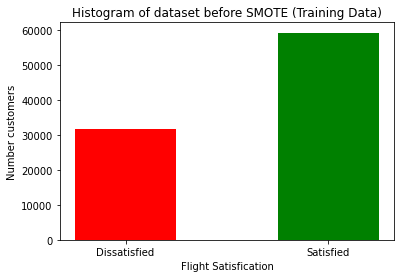

In [26]:
# Great, now we plot. 

def plotBeforeSmoteHist():
    yTrainHist = collections.Counter(y_train)
    # Choose more interesting colors, to signal satisfaction or not.
    plt.bar(yTrainHist.keys(), yTrainHist.values(), width=0.5, color='rgb')
    x = [0,1]
    plt.title("Histogram of dataset before SMOTE (Training Data)")
    plt.ylabel("Number customers")
    plt.xlabel("Flight Satisfication")
    plt.xticks(x,['Dissatisfied','Satisfied'],rotation='horizontal')

plotBeforeSmoteHist()

<ipython-input-27-925e600a9eb8>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(yTrainSmoteHist.keys(), yTrainSmoteHist.values(), width=0.5, color='rgb')


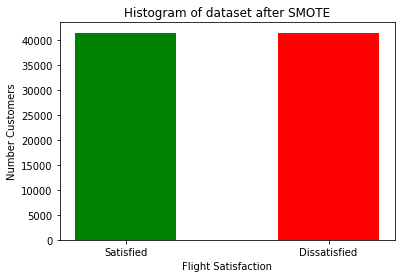

In [27]:
def plotAfterSmoteHist():
    yTrainSmoteHist = collections.Counter(y_train_smote)
    plt.bar(yTrainSmoteHist.keys(), yTrainSmoteHist.values(), width=0.5, color='rgb')
    x = [0,1]
    plt.title("Histogram of dataset after SMOTE")
    plt.ylabel("Number Customers")
    plt.xlabel("Flight Satisfaction")
    # Axes switch here! 
    plt.xticks(x,['Satisfied','Dissatisfied'],rotation='horizontal')
    
plotAfterSmoteHist()

### Step 3: Applying Random Under-Sampling 

Random Under Sampling: randomly delete examples from the majority class

Mainly used to naively re-balance class distribution in imbalance datasets 

We will apply this to result in an approximately 60-40 ratio for majority and minority classes 

We will use three main models: Decision Tree Classifier, Logistic Regression, and Gradient Boosting Classifier. 

Want to get a target AUC value (once we plot ROC curve) >= 0.7. 

Additional caveat: We will ensure no duplicate data is found, by doing one additional pre-processing step to remove duplicates from the dataframe / CSV Kaggle dataset:

df.drop_duplicates()


In [28]:
# Random Under-Sampling Application 

# TO DO: Apply Random Under-Sampling to the results.

# Keep original X and Y before applying Random Under Sampling 

X = data_fill_na_remove.iloc[:,data_fill_na_remove.columns != 'target']
y = data_fill_na_remove['target']

# Make some random under sampling here. 
# Source: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_train, y_train, test_size=0.30, random_state=5)  
smote = False 
if smote:
    sm = SMOTE()
    X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train_smote)
else:
    # Bad idea to hardcode, but this is just for illustration purposes. 
    sample_values = {1:45169, 0:45169}
    rand = RandomUnderSampler(sampling_strategy=sample_values, random_state=0)
    X, y = rand.fit_resample(X, y)
    X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.20, random_state=5)

<ipython-input-29-76efac4210f1>:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(yRandomHist.keys(), yRandomHist.values(), width=0.5, color='rgb')


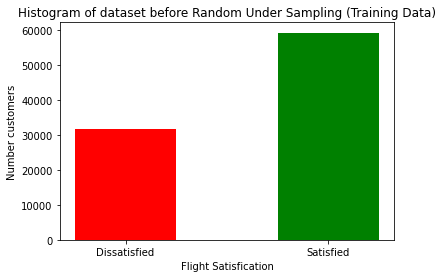

In [29]:
# Apply Random Under Sampling here. 

# Histogram with Random Under Sampling Before and After.
def plotBeforeRandomSampleHist():
    # Fix this code later. 
    yRandomHist = collections.Counter(y_train)
    plt.bar(yRandomHist.keys(), yRandomHist.values(), width=0.5, color='rgb')
    x = [0,1]
    plt.title("Histogram of dataset before Random Under Sampling (Training Data)")
    plt.ylabel("Number customers")
    plt.xlabel("Flight Satisfication")
    plt.xticks(x,['Dissatisfied','Satisfied'],rotation='horizontal')

plotBeforeRandomSampleHist() 

<ipython-input-30-438459daad40>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(yTrainRandomHist.keys(), yTrainRandomHist.values(), width=0.5, color='rgb')


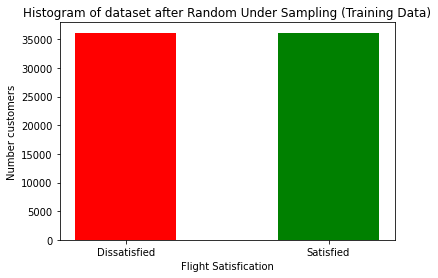

In [30]:
# Now, apply the after random under sampling effect. 

def plotAfterSmoteHist():
    yTrainRandomHist = collections.Counter(y_train_random)
    plt.bar(yTrainRandomHist.keys(), yTrainRandomHist.values(), width=0.5, color='rgb')
    x = [0,1]
    plt.title("Histogram of dataset after Random Under Sampling (Training Data)")
    plt.ylabel("Number customers")
    plt.xlabel("Flight Satisfication")
    plt.xticks(x,['Dissatisfied','Satisfied'],rotation='horizontal')

plotAfterSmoteHist() 

In [31]:
# We will create the three main models after applying SMOTE and Random Under Sampling. 
# We will not display the tree, but rather just show optional depth analysis. 

# Create Three Models: Decision Tree, Logistic Regression, Gradient Boosting Classifier. 

# Decision Tree Classifier 

# Predict the decision tree classifier with the given models. 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictionModel = model.predict(X_test)

treeDepth = model.get_depth()
print('Tree depth: ', treeDepth)

Tree depth:  37


In [32]:
# Helper function to construct decision tree structure. 
def constructTree(tree_depth, xTrain, yTrain, xTest, yTest, scoreList):
    constructedTree = DecisionTreeClassifier(max_depth=tree_depth, criterion='entropy')
    constructedTree = constructedTree.fit(xTrain, yTrain)
    # tree depth
    treeDepth = constructedTree.get_depth()
    print("Tree Depth: ", treeDepth)
    # number of leaves
    print("Number of leaves: ", constructedTree.get_n_leaves()) 
    # feature importance
    print("Feature importances: ")
    print(constructedTree.feature_importances_)
    # Train score
    print("Train score: ", constructedTree.score(xTrain, yTrain))
    # Test score
    testScore = constructedTree.score(xTest, yTest)
    print("Test score: ", testScore)
    scoreList.append(testScore)
    print("*********************************************************************")
    return constructedTree, testScore

In [33]:
# Find max scores here. 
maxTestScore, optimalTreeDepth = 0, 0
optimalTree = None
scoreListTree = []

# Find the top 3 scores 
def findTop3Scores(scoreList):
    topThreeScores = sorted(scoreListTree)[-3:]
    print(topThreeScores)
    return topThreeScores

# Start from depth of 1 to get full tree depth range. 
for i in range(1, treeDepth):
    obtainedTree, testScore = constructTree(i, X_train, y_train, X_test, y_test, scoreListTree)

    for score in scoreListTree:
        if maxTestScore < score:
            maxTestScore = max(maxTestScore, score)
            optimalTreeDepth = i
            optimalTree = obtainedTree

print("Top 3 scores test score: ", findTop3Scores(scoreListTree))
print("Tree length that has the highest test score: ", optimalTreeDepth)

Tree Depth:  1
Number of leaves:  2
Feature importances: 
[0. 0. 0. 1. 0. 0. 0.]
Train score:  0.7607241849619429
Test score:  0.651806796016836
*********************************************************************
Tree Depth:  2
Number of leaves:  4
Feature importances: 
[0.         0.         0.         0.88279037 0.11720963 0.
 0.        ]
Train score:  0.7607241849619429
Test score:  0.651806796016836
*********************************************************************
Tree Depth:  3
Number of leaves:  8
Feature importances: 
[0.         0.         0.         0.81150016 0.16896789 0.01953194
 0.        ]
Train score:  0.774869109947644
Test score:  0.6521147726106149
*********************************************************************
Tree Depth:  4
Number of leaves:  16
Feature importances: 
[0.01300306 0.01309743 0.         0.77717182 0.17820059 0.01852709
 0.        ]
Train score:  0.7827555105811959
Test score:  0.651806796016836
**********************************************

Tree Depth:  31
Number of leaves:  14370
Feature importances: 
[0.07174489 0.07351045 0.0629207  0.33581304 0.11062763 0.1754125
 0.16997079]
Train score:  0.9086079457961195
Test score:  0.5814084796222154
*********************************************************************
Tree Depth:  32
Number of leaves:  14512
Feature importances: 
[0.07143457 0.07358996 0.06297578 0.33461973 0.11092078 0.17577995
 0.17067923]
Train score:  0.9094218839368208
Test score:  0.6209064777743558
*********************************************************************
Tree Depth:  33
Number of leaves:  14639
Feature importances: 
[0.0710279  0.07398517 0.06251918 0.33366228 0.11030895 0.17607557
 0.17242095]
Train score:  0.9098838488274891
Test score:  0.5831793450364439
*********************************************************************
Tree Depth:  34
Number of leaves:  14736
Feature importances: 
[0.07025239 0.07387823 0.06437986 0.33296933 0.11045919 0.17517045
 0.17289055]
Train score:  0.91042280

Test score of Model: 
 0.6183400061595319

Precision score of Model: 
 0.6523917072040769

Recall value of Model: 
 0.8871520258298224

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.12      0.17     13567
           1       0.65      0.89      0.75     25397

    accuracy                           0.62     38964
   macro avg       0.50      0.50      0.46     38964
weighted avg       0.55      0.62      0.55     38964


Confusion Matrix of Model: 

[[ 1562 12005]
 [ 2866 22531]]

F1 Score of Model: 
0.7518729247659887

True Positive Rate: 
0.8871520258298224

True Negative Rate : 
0.11513230633153977

ROC curve for the Model

Precision-Recall curve for the Model


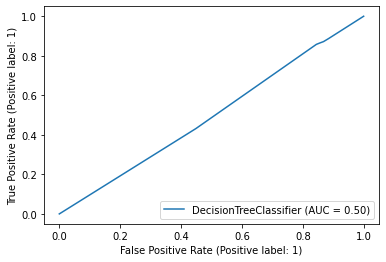

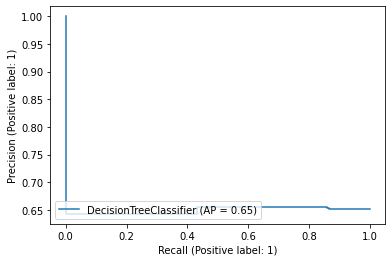

In [34]:
# Display metrics here. 

# display 6 metrics
def display_metrics(model, xTrain, xTest, yTrain, yTest, prediction):
    #1. The accuracy of your model on the test data
    print("Test score of Model: \n", model.score(xTest, yTest))
    print()
    
    #2. The precision and recall value
    print("Precision score of Model: \n", precision_score(yTest, prediction))
    print()
    print("Recall value of Model: \n", recall_score(yTest, prediction))
    print()
    
    #3. A classification report (scikit-learn has a function that can create this for you)
    print("Classification Report on Model: \n")
    print(classification_report(yTest, prediction))
    print()
    
    #4. The confusion matrix for this experiment
    print("Confusion Matrix of Model: \n")
    print(confusion_matrix(yTest, prediction))
    print()
    
    #5. F1 Score for this experiment 
    print("F1 Score of Model: ")
    print(f1_score(yTest, prediction))
    print()

    # Copy of confusion matrix for true positive rate and true negative rate. 
    confusionMatrix = confusion_matrix(yTest, prediction)

    # 6. True Positive Rate 
    truePositiveRate = confusionMatrix[1, 1] / (confusionMatrix[1, 1] + confusionMatrix[1, 0])
    print("True Positive Rate: ")
    print(truePositiveRate)
    print()
    
    # 7. True Negative Rate 
    trueNegativeRate = confusionMatrix[0, 0] / (confusionMatrix[0, 0] + confusionMatrix[0, 1])
    print("True Negative Rate : ")
    print(trueNegativeRate)
    print()
    
    #8. An ROC curve
    print("ROC curve for the Model")
    plot_roc_curve(model, xTest, yTest)
    
    print()
    
    #9. A Precision/Recall curve
    print("Precision-Recall curve for the Model")
    plot_precision_recall_curve(model, xTest, yTest)

display_metrics(model, X_train, X_test, y_train, y_test, predictionModel)

In [35]:
# Logistic Regression. 

# Liblinear setting to fix a sklearn logistic regression error. 
# Source: https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
datasetLogisticRegression = LogisticRegression(solver='liblinear').fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionModelLR = datasetLogisticRegression.predict(X_test)
datasetLogisticRegression

LogisticRegression(solver='liblinear')

In [36]:
# Print the coefficients and intercepts values. 
print(datasetLogisticRegression.coef_)
print(datasetLogisticRegression.intercept_)

[[ 0.2697468   0.47751626 -0.38514081  4.13478503  2.00288838 -0.77543436
  -3.48245118]]
[-3.59832632]


In [37]:
# Linear regression 
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression.predict(X_test)
linearRegression

LinearRegression()

In [38]:
# Print the coefficients and intercepts values.
print(linearRegression.coef_)
print(linearRegression.intercept_)

[ 0.04318384  0.08300188 -0.06717468  0.78199     0.34411537  0.17686477
 -0.92482592]
-0.15546465104564333


Test score of Model: 
 0.579868596653321

Precision score of Model: 
 0.6841568403443633

Recall value of Model: 
 0.6602354608812064

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.40      0.43      0.42     13567
           1       0.68      0.66      0.67     25397

    accuracy                           0.58     38964
   macro avg       0.54      0.54      0.54     38964
weighted avg       0.59      0.58      0.58     38964


Confusion Matrix of Model: 

[[ 5826  7741]
 [ 8629 16768]]

F1 Score of Model: 
0.6719833286578768

True Positive Rate: 
0.6602354608812064

True Negative Rate : 
0.4294243384683423

ROC curve for the Model

Precision-Recall curve for the Model


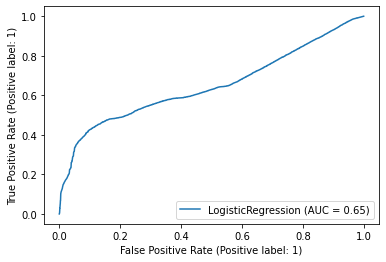

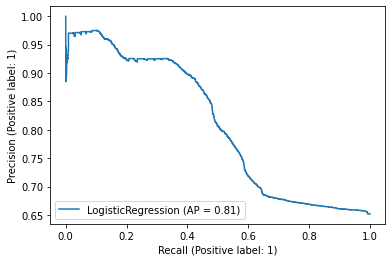

In [39]:
# Call display metrics helper. 
display_metrics(datasetLogisticRegression, X_train, X_test, y_train, y_test, predictionModelLR)

In [40]:
# Gradient Boosting Classifier Model. 
# Get the feature importance from logistic regression using random under sampling dataset. 
datasetGradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=5).fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionGradientBoosting = datasetGradientBoosting.predict(X_test)
datasetGradientBoosting

GradientBoostingClassifier(learning_rate=0.5, random_state=5)

Test score of Model: 
 0.5253567395544605

Precision score of Model: 
 0.6577251747932185

Recall value of Model: 
 0.5667204787967083

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.36      0.45      0.40     13567
           1       0.66      0.57      0.61     25397

    accuracy                           0.53     38964
   macro avg       0.51      0.51      0.50     38964
weighted avg       0.55      0.53      0.53     38964


Confusion Matrix of Model: 

[[ 6077  7490]
 [11004 14393]]

F1 Score of Model: 
0.6088409475465313

True Positive Rate: 
0.5667204787967083

True Negative Rate : 
0.44792511240510063

ROC curve for the Model

Precision-Recall curve for the Model


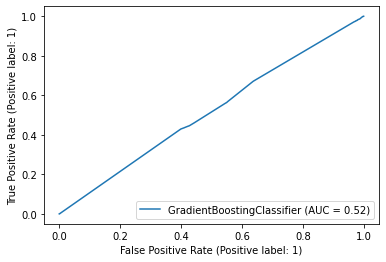

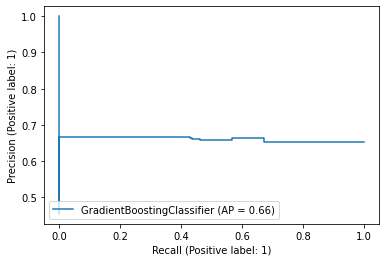

In [41]:
# Gradient Boosting coefficients and metrics. 
display_metrics(datasetGradientBoosting, X_train, X_test, y_train, y_test, predictionGradientBoosting)

### Step 4: Apply Apriori / Market Basket Analysis

This wikipedia article does a good job summarizing what is going on: 

https://en.wikipedia.org/wiki/Apriori_algorithm

We will apply something similar to example 2, using dataframes: 

First, get a frequency count of all ‘similar’ flights 

Then, reduce those particular counts into pairs 

If necessary, into triplets, and so forth, until we get independent sets for each feature 

The details on which we apply Apriori will be calculated with the following metrics: 

Support, Confidence, Lift, and Conviction (each in a separate Python function) 

Main caveat: Try to get ‘clusters’ for our flights to make a classification model to solve the problem. 


In [42]:
data_fill_na_remove

,Seat comfort,Departure/Arrival time convenient,Food and drink,On-board service,Leg room service,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,0,0,3,0,0,0.0,0
1,0,0,0,4,4,310,305.0,0
2,0,0,0,3,3,0,0.0,1
3,0,0,0,1,0,0,0.0,0
4,0,0,0,2,0,0,0.0,0
...,...,...,...,...,...,...,...,...
129875,5,5,5,3,3,0,0.0,1
129876,2,3,2,2,3,174,172.0,0
129877,3,0,3,4,3,155,163.0,0
129878,3,2,3,3,2,193,205.0,0


In [43]:
# TO DO: Apply Apriori / Market Basket Analysis. 
# Source: https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

# Read the columns for the current dataset. 
data_fill_na_remove.columns

Index(['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'On-board service', 'Leg room service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [44]:
# Hot Encode the data here. 
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
    
# Make copy of the data, again. 
data = data_fill_na_remove.copy(deep=True)
data

,Seat comfort,Departure/Arrival time convenient,Food and drink,On-board service,Leg room service,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,0,0,3,0,0,0.0,0
1,0,0,0,4,4,310,305.0,0
2,0,0,0,3,3,0,0.0,1
3,0,0,0,1,0,0,0.0,0
4,0,0,0,2,0,0,0.0,0
...,...,...,...,...,...,...,...,...
129875,5,5,5,3,3,0,0.0,1
129876,2,3,2,2,3,174,172.0,0
129877,3,0,3,4,3,155,163.0,0
129878,3,2,3,3,2,193,205.0,0


In [45]:
# Convert to lists of lists. 
# Source : https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
records = []
# Look at first 5000 records should be enough for analysis, do not need to look at whole thing. 
for i in range(0, 5000):
    records.append([str(data.values[i,j]) for j in range(0, 8)])
    
records

[['0.0', '0.0', '0.0', '3.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '4.0', '4.0', '310.0', '305.0', '0.0'],
 ['0.0', '0.0', '0.0', '3.0', '3.0', '0.0', '0.0', '1.0'],
 ['0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '2.0', '0.0', '0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0', '5.0', '4.0', '0.0', '0.0', '1.0'],
 ['0.0', '0.0', '0.0', '5.0', '0.0', '17.0', '15.0', '1.0'],
 ['0.0', '0.0', '0.0', '3.0', '3.0', '0.0', '0.0', '1.0'],
 ['0.0', '0.0', '0.0', '4.0', '0.0', '0.0', '0.0', '1.0'],
 ['0.0', '0.0', '0.0', '2.0', '4.0', '30.0', '26.0', '1.0'],
 ['0.0', '0.0', '0.0', '3.0', '0.0', '47.0', '48.0', '0.0'],
 ['0.0', '0.0', '0.0', '3.0', '2.0', '0.0', '0.0', '1.0'],
 ['0.0', '0.0', '0.0', '1.0', '3.0', '0.0', '0.0', '1.0'],
 ['0.0', '1.0', '0.0', '3.0', '5.0', '0.0', '0.0', '0.0'],
 ['0.0', '1.0', '0.0', '5.0', '0.0', '40.0', '48.0', '1.0'],
 ['0.0', '1.0', '0.0', '3.0', '4.0', '0.0', '0.0', '0.0'],
 ['0.0', '1.0', '0.0', '4.0', '4.0', '5.0', 

In [46]:
# Apply apriori to the algorithm. 
association_rules = apriori(records, min_support=0.5, min_confidence=0.2, min_lift=3, min_length=2)
association_rules
association_results = list(association_rules)
association_results

[]

In [47]:
# Function to 'print out' the needed metrics: 
# TO DO: Fix Apriori here. 
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------")
    print(item)

In [48]:
# Debug: print the length of association rules 
print([item for item in association_rules])

[]


### Step 5: Apply FP Growth / Market Basket Analysis 

This wikipedia article does a good job summarizing what is going on: 

https://en.wikipedia.org/wiki/Association_rule_learning#FP-growth_algorithm

We will apply to a trie dataset structure (using Python Collections methods and some basic tree algorithms, such as DFS / BFS): 

Get the frequency pattern table from each ‘frequency’ of flight features 

Create a header table as well, with the ‘counts’ of each frequency 

Build the FP tree into a trie, inserting transactions per layer 

Continue building the trees via growth of the bottom of the header table 

Main caveat: Build a ‘pattern’ that we can analyze using classification algorithms and modeling. 


In [49]:
# TO DO: Apply FP Growth / Market Basket Analysis. 
# Source: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/#example-1-generating-frequent-itemsets

# Use the same records from apriori here.
# For this portion only, imports acceptable. 
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Encoder can be thought out as a 'trie'
te = TransactionEncoder()
print(te)

TransactionEncoder()


In [50]:
# Frequency Pattern table. 
te_ary = te.fit(records).transform(records)
print("Frequency Table :\n")
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Frequency Table :



,0.0,1.0,10.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,...,92.0,93.0,94.0,95.0,96.0,97.0,970.0,978.0,98.0,99.0
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
# Return items with least support, using FP Growth algorithm. 
# Header table, from trie values. 
from mlxtend.frequent_patterns import fpgrowth
print("Header Table: \n")
fpgrowth(df, min_support=0.6)

Header Table: 



,support,itemsets
0,0.8922,(0)
1,0.6246,(168)
2,0.8506,(1)
3,0.7428,"(0, 1)"


In [52]:
# Another FP Growth metric. 
print("Header Table 2 :\n")
fpgrowth(df, min_support=0.6, use_colnames=True)

Header Table 2 :



,support,itemsets
0,0.8922,(0.0)
1,0.6246,(4.0)
2,0.8506,(1.0)
3,0.7428,"(1.0, 0.0)"


### Step 6: Make Predictive Labels and ROC Curves / Plots 

Rather straightforward, AUC / ROC Curves for each of 3 models (Decision Tree, Logistic Regression, and Gradient Boosting Classifications) for both SMOTE and random under sampling 

Additional ROC curves for Apriori and FP Growth, compared to each other in a matplotlib Python library 
Generally ideal results: > 0.7 AUC (however, we are not guaranteeing it, as explained in future work section of this episode). 

ROC curve will be compared to a ‘perfect’ classifier of AUC = 1.0 (the hyperbola that we did for the Shang Chi episode) 

So, you can see why this problem is the ‘grand finale’ of S2, put all of the previous problem applications together for a project… 


In [53]:
# Each model will have ROC for two parts: SMOTE and Random Under Sampling. 

# Model for Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
predictionModel2 = model2.predict(X_test_smote)

treeDepth2 = model2.get_depth()
print('Tree depth: ', treeDepth2)

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
predictionModel3 = model3.predict(X_test_random)

treeDepth3 = model3.get_depth()
print('Tree depth: ', treeDepth3)

Tree depth:  37
Tree depth:  37


In [54]:
# Model for Logistic Regression 
# Liblinear setting to fix a sklearn logistic regression error. 
# Source: https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
datasetLogisticRegression2 = LogisticRegression(solver='liblinear').fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionModelLR2 = datasetLogisticRegression2.predict(X_test_smote)
datasetLogisticRegression2

# Liblinear setting to fix a sklearn logistic regression error. 
# Source: https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
datasetLogisticRegression3 = LogisticRegression(solver='liblinear').fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionModelLR3 = datasetLogisticRegression3.predict(X_test_random)
datasetLogisticRegression3

LogisticRegression(solver='liblinear')

In [55]:
# Model for Gradient Boosting Classification 
# Gradient Boosting Classifier Model. 
# Get the feature importance from logistic regression using random under sampling dataset. 
datasetGradientBoosting1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=5).fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionGradientBoosting1 = datasetGradientBoosting1.predict(X_test_smote)
datasetGradientBoosting1

GradientBoostingClassifier(learning_rate=0.5, random_state=5)

In [56]:
# Model for Gradient Boosting Classification 
# Gradient Boosting Classifier Model. 
# Get the feature importance from logistic regression using random under sampling dataset. 
datasetGradientBoosting2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=5).fit(X_train, y_train)
# Train an supervised logistic regression learning model that can be used to generate predictions 
# for the flight delays for 2018 American Airlines Flights. 
predictionGradientBoosting2 = datasetGradientBoosting2.predict(X_test_random)
datasetGradientBoosting2

GradientBoostingClassifier(learning_rate=0.5, random_state=5)

In [57]:
# Debug to print out each portion. 
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,0.4,0.6,0.6,0.4,0.4,0.010638,0.005381
1,0.6,0.8,0.8,0.4,0.8,0.000000,0.000000
2,0.2,0.8,0.8,0.2,0.8,0.003546,0.010762
3,1.0,0.8,1.0,0.8,1.0,0.000000,0.015247
4,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...
90911,0.8,0.2,0.2,0.8,0.4,0.000000,0.000000
90912,0.2,0.2,0.2,1.0,0.6,0.000000,0.000000
90913,0.6,0.6,0.6,0.8,0.6,0.000000,0.000897
90914,0.8,0.6,0.6,0.6,0.2,0.000000,0.000000


In [58]:
pd.DataFrame(X_test)

,Seat comfort,Departure/Arrival time convenient,Food and drink,On-board service,Leg room service,Departure Delay in Minutes,Arrival Delay in Minutes
124913,5,5,5,5,5,0,6.0
81946,3,2,2,3,3,0,16.0
61757,5,0,5,3,2,1,0.0
129745,3,5,3,3,5,0,0.0
76675,2,2,5,4,5,13,8.0
...,...,...,...,...,...,...,...
42528,1,1,1,3,2,1,1.0
122901,5,3,3,5,2,1,9.0
17561,2,5,2,5,2,0,0.0
90576,4,1,4,4,4,0,0.0


In [59]:
pd.DataFrame(y_train)

,target
74394,0
56267,1
68789,1
2783,1
120998,1
...,...
101350,0
124605,1
20463,1
18638,0


In [60]:
pd.DataFrame(y_test)

,target
124913,1
81946,0
61757,1
129745,1
76675,1
...,...
42528,0
122901,0
17561,1
90576,1


In [61]:
pd.DataFrame(predictionModel2)

,0
0,1
1,1
2,0
3,1
4,1
...,...
27270,1
27271,1
27272,1
27273,1


#### Fair warning, since we did not do enough to 'process' each model enough for the remaining features, hope for the best something above 0.5 AUC and AP value between 0.65 and 0.70. These models are just for illustrative purposes. 

#### Decision Tree SMOTE and Random Under Sampling: 

Test score of Model: 
 0.5388817598533455

Precision score of Model: 
 0.6488942919995369

Recall value of Model: 
 0.6325263811297331

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.37      0.36      9554
           1       0.65      0.63      0.64     17721

    accuracy                           0.54     27275
   macro avg       0.50      0.50      0.50     27275
weighted avg       0.54      0.54      0.54     27275


Confusion Matrix of Model: 

[[ 3489  6065]
 [ 6512 11209]]

F1 Score of Model: 
0.6406058008286899

True Positive Rate: 
0.6325263811297331

True Negative Rate : 
0.36518735608122255

ROC curve for the Model

Precision-Recall curve for the Model


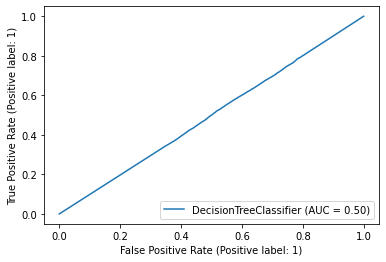

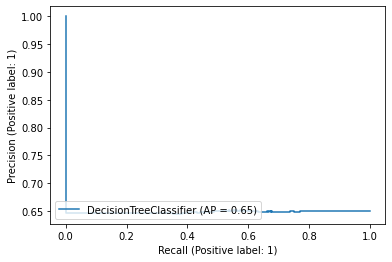

In [62]:
# Graph of all of the 6 plots (Decision Tree SMOTE and Random Under Sampling, Logistic Regression 
# SMOTE and Random Under Sampling, Gradient Boosting Classifier SMOTE and Random Under Sampling)
display_metrics(model2, X_train, X_test_smote[:len(predictionModel2)], y_train, y_test[:len(predictionModel2)], predictionModel2)

Test score of Model: 
 0.5414545052025681

Precision score of Model: 
 0.6517515823776399

Recall value of Model: 
 0.8835273128876051

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.12      0.18      6297
           1       0.65      0.88      0.75     11771

    accuracy                           0.62     18068
   macro avg       0.50      0.50      0.46     18068
weighted avg       0.55      0.62      0.55     18068


Confusion Matrix of Model: 

[[  740  5557]
 [ 1371 10400]]

F1 Score of Model: 
0.7501442585112521

True Positive Rate: 
0.8835273128876051

True Negative Rate : 
0.11751627759250437

ROC curve for the Model

Precision-Recall curve for the Model


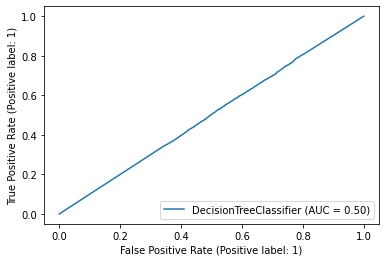

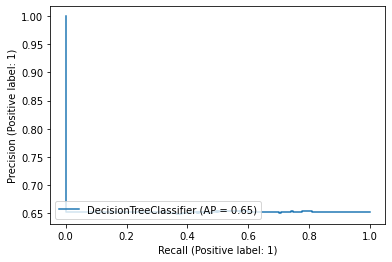

In [63]:
display_metrics(model3, X_train, X_test_smote[:len(predictionModel3)], y_train, y_test[:len(predictionModel3)], predictionModel3)

#### Logistic Regression SMOTE and Random Under Sampling: 

Test score of Model: 
 0.5727222731439047

Precision score of Model: 
 0.6488942919995369

Recall value of Model: 
 0.6325263811297331

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.37      0.36      9554
           1       0.65      0.63      0.64     17721

    accuracy                           0.54     27275
   macro avg       0.50      0.50      0.50     27275
weighted avg       0.54      0.54      0.54     27275


Confusion Matrix of Model: 

[[ 3489  6065]
 [ 6512 11209]]

F1 Score of Model: 
0.6406058008286899

True Positive Rate: 
0.6325263811297331

True Negative Rate : 
0.36518735608122255

ROC curve for the Model

Precision-Recall curve for the Model


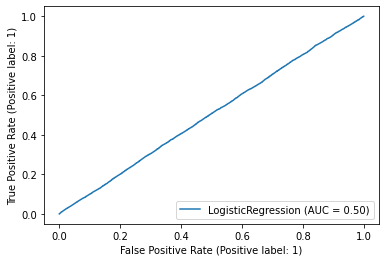

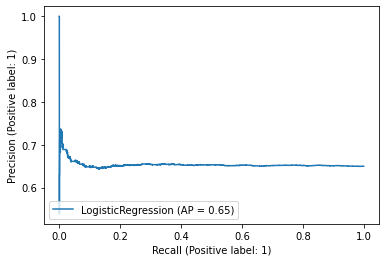

In [64]:
display_metrics(datasetLogisticRegression2, X_train, X_test_smote[:len(predictionModelLR2)], y_train, y_test[:len(predictionModelLR2)], predictionModel2)

Test score of Model: 
 0.5737214965685189

Precision score of Model: 
 0.6517515823776399

Recall value of Model: 
 0.8835273128876051

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.12      0.18      6297
           1       0.65      0.88      0.75     11771

    accuracy                           0.62     18068
   macro avg       0.50      0.50      0.46     18068
weighted avg       0.55      0.62      0.55     18068


Confusion Matrix of Model: 

[[  740  5557]
 [ 1371 10400]]

F1 Score of Model: 
0.7501442585112521

True Positive Rate: 
0.8835273128876051

True Negative Rate : 
0.11751627759250437

ROC curve for the Model

Precision-Recall curve for the Model


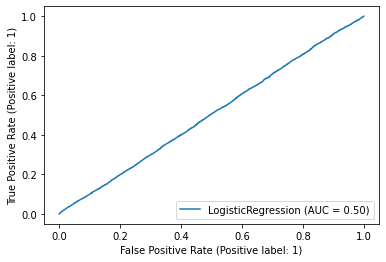

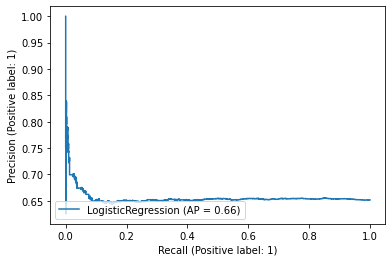

In [65]:
display_metrics(datasetLogisticRegression3, X_train, X_test_smote[:len(predictionModelLR3)], y_train, y_test[:len(predictionModelLR3)], predictionModel3)

#### Gradient Boosting SMOTE and Random Under Sampling 

Test score of Model: 
 0.5420348304307975

Precision score of Model: 
 0.6499942640816795

Recall value of Model: 
 0.6394672986851758

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.35      0.36      0.36      9554
           1       0.65      0.64      0.64     17721

    accuracy                           0.54     27275
   macro avg       0.50      0.50      0.50     27275
weighted avg       0.55      0.54      0.54     27275


Confusion Matrix of Model: 

[[ 3452  6102]
 [ 6389 11332]]

F1 Score of Model: 
0.6446878111221733

True Positive Rate: 
0.6394672986851758

True Negative Rate : 
0.36131463261461166

ROC curve for the Model

Precision-Recall curve for the Model


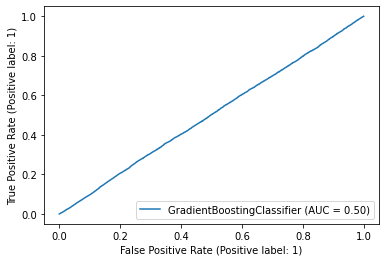

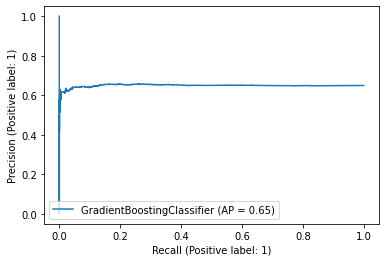

In [66]:
display_metrics(datasetGradientBoosting1, X_train, X_test_smote[:len(predictionGradientBoosting1)], y_train, y_test[:len(predictionGradientBoosting1)], predictionGradientBoosting1)

Test score of Model: 
 0.544166482178437

Precision score of Model: 
 0.6458558647134008

Recall value of Model: 
 0.5580664344575652

Classification Report on Model: 

              precision    recall  f1-score   support

           0       0.34      0.43      0.38      6297
           1       0.65      0.56      0.60     11771

    accuracy                           0.51     18068
   macro avg       0.49      0.49      0.49     18068
weighted avg       0.54      0.51      0.52     18068


Confusion Matrix of Model: 

[[2695 3602]
 [5202 6569]]

F1 Score of Model: 
0.5987603682435512

True Positive Rate: 
0.5580664344575652

True Negative Rate : 
0.42798157852945845

ROC curve for the Model

Precision-Recall curve for the Model


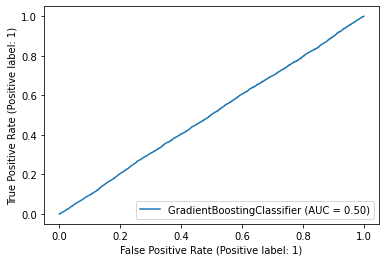

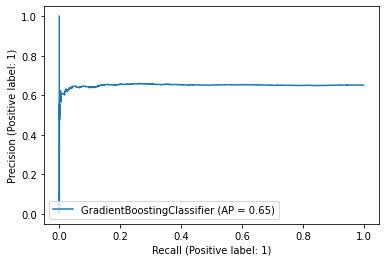

In [67]:
display_metrics(datasetGradientBoosting2, X_train, X_test_smote[:len(predictionGradientBoosting2)], y_train, y_test[:len(predictionGradientBoosting2)], predictionGradientBoosting2)

### Step 7: Making ‘Predictive Labels and Plots’: Heatmaps

Heatmaps are not common for classification problems, but for this episode, we will employ the use of heatmaps to generally ‘compare’ the outliers of each feature.

3 x 3 confusion matrices to compare for each heatmap structure, so we are looking at 6 total heatmaps.

For extra analysis, we might also employ some linear regression, for a more ‘plot based’ comparison between features 
Heatmaps may not be accurate if the features are positively correlated, so we will be careful with each feature used 
i.e. do not apply any algorithms until the data has been pre-processed properly! 


In [68]:
# Reminder for all of the columns 
print(data.columns)

Index(['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'On-board service', 'Leg room service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'target'],
      dtype='object')


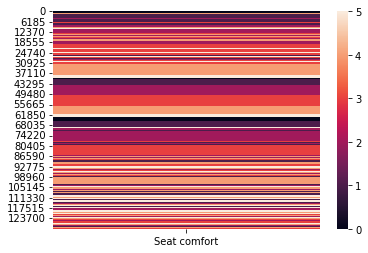

In [69]:
# Apply heatmaps to all of the 'necessary' features here.
# Plot Heatmap 1. 
def plot_heatmap_1():
    sns.heatmap(pd.DataFrame(data['Seat comfort']))
    print()
plot_heatmap_1() 

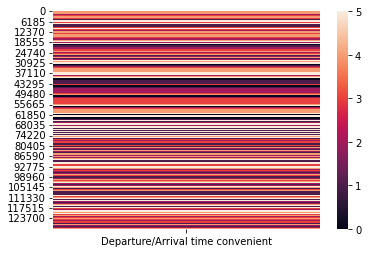

In [70]:
# Plot Heatmap 2. 
def plot_heatmap_2():
    sns.heatmap(pd.DataFrame(data['Departure/Arrival time convenient']))
    print()
plot_heatmap_2() 

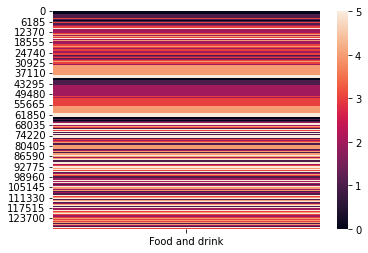

In [71]:
# Plot Heatmap 3. 
def plot_heatmap_3():
    sns.heatmap(pd.DataFrame(data['Food and drink']))
    print()
plot_heatmap_3() 

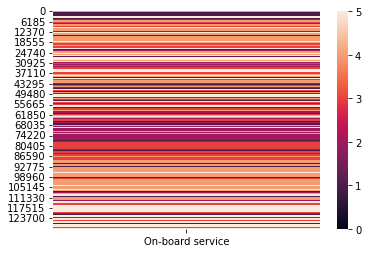

In [72]:
# Plot Heatmap 4. 
def plot_heatmap_4():
    sns.heatmap(pd.DataFrame(data['On-board service']))
    print()
plot_heatmap_4() 

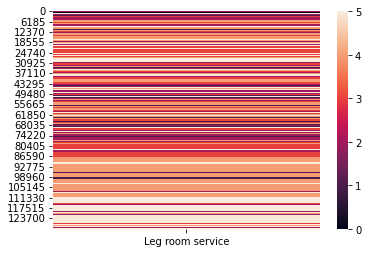

In [73]:
# Plot Heatmap 5. 
def plot_heatmap_5():
    sns.heatmap(pd.DataFrame(data['Leg room service']))
    print()
plot_heatmap_5() 

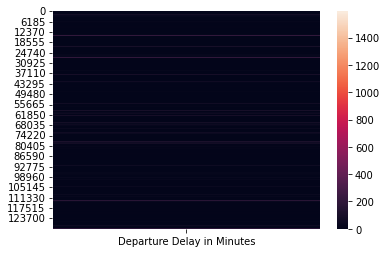

In [74]:
# Plot Heatmap 6. 
def plot_heatmap_6():
    sns.heatmap(pd.DataFrame(data['Departure Delay in Minutes']))
    print()
plot_heatmap_6() 

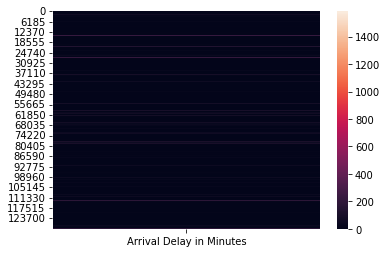

In [75]:
# Plot Heatmap 7. 
def plot_heatmap_7():
    sns.heatmap(pd.DataFrame(data['Arrival Delay in Minutes']))
    print()
plot_heatmap_7() 

#### So, based on the heatmaps, it looks like we only have five 'viable' features to compare for clustering and final analysis of this classification problem. This approach will help us eliminate feature 6 ('Departure Delay in Minutes') and feature 7 ('Arrival Delay in Minutes'). It is good to reduce the dimensionality of your features as much as possible before applying final analysis. 

#### Final five features to compare: 

'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'On-board service', 'Leg room service'

### Step 8: Making ‘Predictive Labels and Plots’: Clusters

Finally, we apply some clusters, to wrap up the classification analysis. 

To avoid ‘bias’ inside the sampling, we will have an incremental amount of clustering (related to Teen Titans problem part c). 

Clusters will be put in separate features, NOT mixed together (GMM is not a good algorithm for classification modeling, much rather prefer PCA or even SVD, Principal Component Analysis and Singular Value Decomposition) 
We will get our solution for the clustering work once we have hit the elbow rule n amount of clusters (n can vary between features). 

We then list top percentage of features that give us a ‘reasonable’ classification / tier rank of the ‘best’ flights for post-pandemic and post-2022. 


In [76]:
# Make some clusters with incremental amount of clusters.
# We can 'pair' the clusters with top 4 features of Seat Comfort and Food and Drink (given heatmap results,
# they are the most closely correlated features) and with Departure/Arrival time convenient and 
# On-board service. After further analysis, we will not need 'Leg room service' as a feature. 

# We can make clusters without using blobs, given the data already provided. 
data1 = pd.DataFrame(data['Seat comfort']) 
data2 = pd.DataFrame(data['Departure/Arrival time convenient'])
data3 = pd.DataFrame(data['Food and drink'])
data4 = pd.DataFrame(data['On-board service'])
data5 = pd.DataFrame(data['Leg room service'])

# Make some columns. 
data1.columns=['Rating']
data2.columns=["Rating"]
data3.columns=["Rating"]
data4.columns=["Rating"]
data5.columns=["Rating"]

data1

,Rating
0,0
1,0
2,0
3,0
4,0
...,...
129875,5
129876,2
129877,3
129878,3


In [77]:
data2

,Rating
0,0
1,0
2,0
3,0
4,0
...,...
129875,5
129876,3
129877,0
129878,2


In [78]:
data3

,Rating
0,0
1,0
2,0
3,0
4,0
...,...
129875,5
129876,2
129877,3
129878,3


In [79]:
data4

,Rating
0,3
1,4
2,3
3,1
4,2
...,...
129875,3
129876,2
129877,4
129878,3


In [80]:
data5

,Rating
0,0
1,4
2,3
3,0
4,0
...,...
129875,3
129876,3
129877,3
129878,2


You can see a problem, we can't do clustering only on one dimension. So, we will 'expand' 
each of the existing columns into 2D, by 'concatenating' related features for comparison. 

In [81]:
# Source: https://stackoverflow.com/questions/68408981/pandas-convert-a-column-of-1d-arrays-to-a-2d-array
# Source #2: https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy
# B = np.reshape(A, (-1, 2))
# Make new dataframe with Seat Comfort and Food and drink features. 
data1_comb = pd.concat([data1,data3],axis=1)
data1_comb.columns = ['Seat Comfort','Food and Drink']
#data1_conv = np.array(data1['Seat Comfort'],data1['Food and drink'])
#data1_new = data1_comb.reshape(-1,1)
pd.DataFrame(data1_comb)

,Seat Comfort,Food and Drink
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
129875,5,5
129876,2,2
129877,3,3
129878,3,3


In [82]:
# Make new dataframe with Departure/Arrival time convenient and 
# On-board service features. 
data2_comb = pd.concat([data2,data4],axis=1)
data2_comb.columns = ['Departure/Arrival time convenient','On board service']
#data1_conv = np.array(data1['Seat Comfort'],data1['Food and drink'])
#data1_new = data1_comb.reshape(-1,1)
pd.DataFrame(data2_comb)

,Departure/Arrival time convenient,On board service
0,0,3
1,0,4
2,0,3
3,0,1
4,0,2
...,...,...
129875,5,3
129876,3,2
129877,0,4
129878,2,3


<AxesSubplot:xlabel='Seat Comfort', ylabel='Food and Drink'>

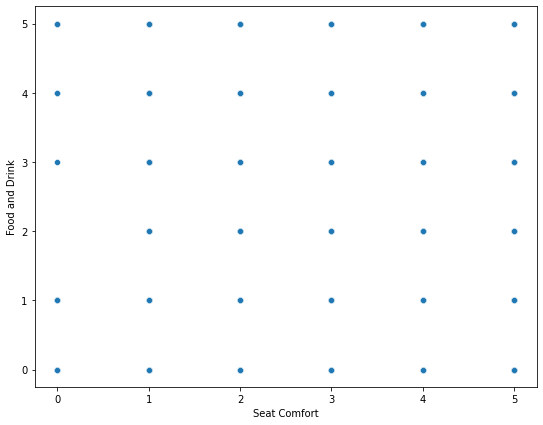

In [83]:
# Apply clustering here (using PCA techniques). 
plt.figure(figsize=(9,7))
sns.scatterplot(data=data1_comb, 
                x="Seat Comfort",
                y="Food and Drink", 
                palette=["red"])

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='On board service'>

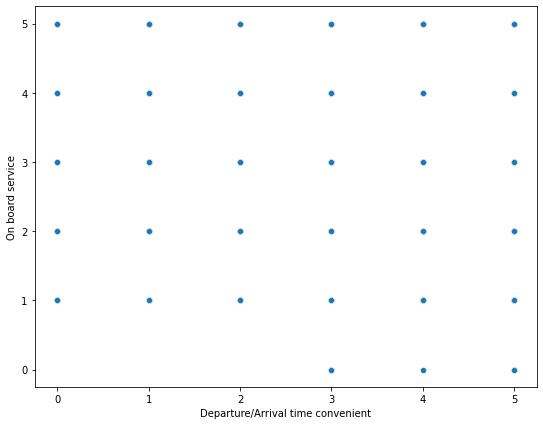

In [84]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=data2_comb, 
                x="Departure/Arrival time convenient",
                y="On board service", 
                palette=["green"])

Yeah, these are some 'weird' clusters, because these features correlate almost too well. This type of cluster is called a uniform cluster. 

Feature: 0, Score: 0.06625
Feature: 1, Score: 0.07108
Feature: 2, Score: 0.05942
Feature: 3, Score: 0.39494
Feature: 4, Score: 0.09874
Feature: 5, Score: 0.15394
Feature: 6, Score: 0.15563


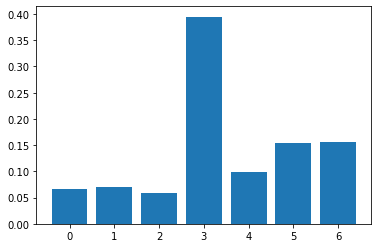

In [85]:
# List top percentage of features with 'reasonable' classification / tier rank 

# To get the 'tier ranks', we will need to calculate 'final' feature importance for both datasets. 

# We apply some linear regression to determine the feature importances. 
# Source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Re-apply the Logistic Regression Model here, given it is the 'best' AUC value for the models.  
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### So, we conclude the episode and in general our S2 Algos in 10 with Data Science X Algorithms mixer by determining that the feature ranking is as follows: 

#### Selected features for analysis (we removed leg room service after heat map analysis): 

Feature 1: 'Seat comfort'

Feature 2: 'Departure/Arrival time convenient'

Feature 3: 'Food and drink'

Feature 4: 'On-board service'

1) On-board service. 

2) Departure/Arrival time convenient. 

3) Seat comfort 

4) Food and drink. 

### Epilogue / Final Remarks 

#### What could have we done better? 

Many things: more specialized pre-processing, more classifiers (even potentially Neural Nets and Tensorflow), etc. 
Could have combined datasets (harder to do classification in Python this way, due to more features making it harder to pre-process the data without bias).

Cleaned up data more rigorously (though NaN will do the trick for any general Kaggle dataset work, however, for interviews and competitive dataset work, this will not do). 

Apriori turned out to be a poor design choice, much better to use clustering / classification approaches. FP Growth yielded more promising results. 

Chose a different problem to work with (i.e. the flight prediction delays from my own Masters Data Mining project)? 
Point is: this is just scratching the surface of what we can do, since we can’t put an entire exploratory analysis of classification in just 1 episode / 50 minutes (it would take pretty much another semester project to get close to that, and to quote the meme, I don’t have time fo that.)  